In [3]:
import pandas as pd
dataset=pd.read_csv("kidney_disease.csv")
dataset.shape

(400, 26)

In [4]:
dataset.columns = ['id',
    'age',
    'blood_pressure',
    'specific_gravity',
    'albumin',
    'sugar',
    'red_blood_cells',
    'pus_cell',
    'pus_cell_clumps',
    'bacteria',
    'blood_glucose_random',
    'blood_urea',
    'serum_creatinine',
    'sodium',
    'potassium',
    'haemoglobin',
    'packed_cell_volume',
    'white_blood_cell_count',
    'red_blood_cell_count',
    'hypertension',
    'diabetes_mellitus',
    'coronary_artery_disease',
    'appetite',
    'peda_edema',
    'aanemia',
    'classification'
]

In [5]:
from univariate_utils import Univariate
num_cols,cat_cols=Univariate.quanqual(dataset)
num_cols

['id',
 'age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin']

In [6]:
df = dataset[num_cols].copy()
df

,id,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4
1,1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6
...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7
396,396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5
397,397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8
398,398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2


In [7]:
df.isnull().sum().sort_values(ascending=False)

potassium               88
sodium                  87
haemoglobin             52
sugar                   49
specific_gravity        47
albumin                 46
blood_glucose_random    44
blood_urea              19
serum_creatinine        17
blood_pressure          12
age                      9
id                       0
dtype: int64

In [8]:
df = df.replace("?", pd.NA)
for c in df.columns:
    df[c] = pd.to_numeric(df[c], errors="coerce")
df

,id,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4
1,1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6
...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7
396,396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5
397,397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8
398,398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2


In [9]:
df = df.drop(columns=['id', 'specific_gravity', 'albumin', 'sugar'], errors='ignore')
df

,age,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
0,48.0,80.0,121.0,36.0,1.2,NaN,NaN,15.4
1,7.0,50.0,NaN,18.0,0.8,NaN,NaN,11.3
2,62.0,80.0,423.0,53.0,1.8,NaN,NaN,9.6
3,48.0,70.0,117.0,56.0,3.8,111.0,2.5,11.2
4,51.0,80.0,106.0,26.0,1.4,NaN,NaN,11.6
...,...,...,...,...,...,...,...,...
395,55.0,80.0,140.0,49.0,0.5,150.0,4.9,15.7
396,42.0,70.0,75.0,31.0,1.2,141.0,3.5,16.5
397,12.0,80.0,100.0,26.0,0.6,137.0,4.4,15.8
398,17.0,60.0,114.0,50.0,1.0,135.0,4.9,14.2


In [10]:
summary=[]
for column in df:
    s = pd.to_numeric(df[column], errors="coerce").dropna()
    summary.append({
        "Column": column,
        "Count": len(s),
        "Missing": df[column].isnull().sum()
    })
summary_df = pd.DataFrame(summary).set_index("Column")
print(summary_df)

                      Count  Missing
Column                              
age                     391        9
blood_pressure          388       12
blood_glucose_random    356       44
blood_urea              381       19
serum_creatinine        383       17
sodium                  313       87
potassium               312       88
haemoglobin             348       52


In [11]:
import numpy as np
univariate_stats = {}
for column in df:
    s = df[column].dropna()
    q1, q2, q3 = s.quantile(0.25), s.quantile(0.50), s.quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    univariate_stats[column] = {
        "Mean": s.mean(),
        "Median":s.median(),
        "Mode":s.mode()[0] if not s.mode().empty else np.nan,
        "IQR":iqr,
        "Lower_Fence": lower,
        "Upper_Fence": upper,
        "Min": s.min(),
        "Max": s.max(),
        "Skew":s.skew(),
        "Kurtosis":s.kurtosis(),
        "Variance":s.var(),
        "Std Dev": s.std()
    }
univariate_df = pd.DataFrame(univariate_stats)
univariate_df = univariate_df.round(2)
univariate_df

    

,age,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
Mean,51.48,76.47,148.04,57.43,3.07,137.53,4.63,12.53
Median,55.00,80.00,121.00,42.00,1.30,138.00,4.40,12.65
Mode,60.00,80.00,99.00,46.00,1.20,135.00,3.50,15.00
IQR,22.50,10.00,64.00,39.00,1.90,7.00,1.10,4.70
Lower_Fence,8.25,55.00,3.00,-31.50,-1.95,124.50,2.15,3.25
Upper_Fence,98.25,95.00,259.00,124.50,5.65,152.50,6.55,22.05
Min,2.00,50.00,22.00,1.50,0.40,4.50,2.50,3.10
Max,90.00,180.00,490.00,391.00,76.00,163.00,47.00,17.80
Skew,-0.67,1.61,2.01,2.63,7.51,-7.00,11.58,-0.34
Kurtosis,0.06,8.65,4.23,9.35,79.30,85.53,142.51,-0.47


In [12]:
df.isnull().sum()

age                      9
blood_pressure          12
blood_glucose_random    44
blood_urea              19
serum_creatinine        17
sodium                  87
potassium               88
haemoglobin             52
dtype: int64

In [13]:

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="median")
df_imputed = pd.DataFrame(
    imp.fit_transform(df), 
    columns=df.columns,
    index=df.index
)
print("Remaining NaNs:", df_imputed.isnull().sum().sum())

Remaining NaNs: 0


In [14]:
df_imputed

,age,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
0,48.0,80.0,121.0,36.0,1.2,138.0,4.4,15.4
1,7.0,50.0,121.0,18.0,0.8,138.0,4.4,11.3
2,62.0,80.0,423.0,53.0,1.8,138.0,4.4,9.6
3,48.0,70.0,117.0,56.0,3.8,111.0,2.5,11.2
4,51.0,80.0,106.0,26.0,1.4,138.0,4.4,11.6
...,...,...,...,...,...,...,...,...
395,55.0,80.0,140.0,49.0,0.5,150.0,4.9,15.7
396,42.0,70.0,75.0,31.0,1.2,141.0,3.5,16.5
397,12.0,80.0,100.0,26.0,0.6,137.0,4.4,15.8
398,17.0,60.0,114.0,50.0,1.0,135.0,4.9,14.2


In [15]:
outlier_report = []
for column in univariate_df:
    lower = univariate_df[column]["Lower_Fence"]
    upper = univariate_df[column]["Upper_Fence"]
    s = df_imputed[column]
    lower_outliers = (s < lower).sum()
    upper_outliers = (s > upper).sum()
    outlier_report.append({
        "Column": column,
        "Lower_Outliers": lower_outliers,
        "Upper_Outliers": upper_outliers,
        "Total_Outliers": lower_outliers + upper_outliers
    })

outlier_df = pd.DataFrame(outlier_report).set_index("Column")
print("\nOutlier Counts (before Winsorization):\n", outlier_df)


Outlier Counts (before Winsorization):
                       Lower_Outliers  Upper_Outliers  Total_Outliers
Column                                                              
age                               10               0              10
blood_pressure                     5              31              36
blood_glucose_random               0              34              34
blood_urea                         0              38              38
serum_creatinine                   0              51              51
sodium                            15               1              16
potassium                          0               4               4
haemoglobin                        1               0               1


In [16]:
df_winsorized = df_imputed.copy()
for col in univariate_df.columns:
    lower = univariate_df.loc["Lower_Fence", col]
    upper = univariate_df.loc["Upper_Fence", col]
    df_winsorized[col] = df_winsorized[col].clip(lower, upper)

print("\nAfter Winsorization Min/Max:\n", df_winsorized.describe().T[["min","max"]])



After Winsorization Min/Max:
                          min     max
age                     8.25   90.00
blood_pressure         55.00   95.00
blood_glucose_random   22.00  259.00
blood_urea              1.50  124.50
serum_creatinine        0.40    5.65
sodium                124.50  152.50
potassium               2.50    6.55
haemoglobin             3.25   17.80


In [17]:
df_winsorized

,age,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
0,48.00,80.0,121.0,36.0,1.2,138.0,4.4,15.4
1,8.25,55.0,121.0,18.0,0.8,138.0,4.4,11.3
2,62.00,80.0,259.0,53.0,1.8,138.0,4.4,9.6
3,48.00,70.0,117.0,56.0,3.8,124.5,2.5,11.2
4,51.00,80.0,106.0,26.0,1.4,138.0,4.4,11.6
...,...,...,...,...,...,...,...,...
395,55.00,80.0,140.0,49.0,0.5,150.0,4.9,15.7
396,42.00,70.0,75.0,31.0,1.2,141.0,3.5,16.5
397,12.00,80.0,100.0,26.0,0.6,137.0,4.4,15.8
398,17.00,60.0,114.0,50.0,1.0,135.0,4.9,14.2


In [18]:
df_winsorized.isnull().sum().sum()

np.int64(0)

In [19]:
import matplotlib.pyplot as plt

# 1) Boxplots: BEFORE vs AFTER (with IQR fence lines)
def boxplots_before_after(df_before, df_after, fences, cols=None):
    """
    df_before : DataFrame before winsorization (e.g., df_imputed)
    df_after  : DataFrame after winsorization (e.g., df_winsorized)
    fences    : univariate_df with 'Lower_Fence' and 'Upper_Fence' rows
    cols      : list of columns to plot (defaults to all in fences)
    """
    if cols is None:
        cols = list(fences.columns)

    for col in cols:
        lb = fences.loc["Lower_Fence", col]
        ub = fences.loc["Upper_Fence", col]

        fig, axes = plt.subplots(1, 2, figsize=(11, 4), sharey=True)
        fig.suptitle(f"{col} — Boxplot (Before vs After Winsorization)", fontsize=12, y=1.05)

        # BEFORE
        axes[0].boxplot(df_before[col].dropna(), vert=False)
        axes[0].axvline(lb, linestyle="--", linewidth=1)
        axes[0].axvline(ub, linestyle="--", linewidth=1)
        axes[0].set_title("Before")
        axes[0].set_xlabel(col)

        # AFTER
        axes[1].boxplot(df_after[col].dropna(), vert=False)
        axes[1].axvline(lb, linestyle="--", linewidth=1)
        axes[1].axvline(ub, linestyle="--", linewidth=1)
        axes[1].set_title("After (Winsorized)")
        axes[1].set_xlabel(col)

        plt.tight_layout()
        plt.show()

# 2) Histograms: BEFORE vs AFTER (same bins)
def hist_before_after(df_before, df_after, fences, cols=None, bins=30):
    if cols is None:
        cols = list(fences.columns)

    for col in cols:
        lb = fences.loc["Lower_Fence", col]
        ub = fences.loc["Upper_Fence", col]

        # common bin edges so shapes are comparable
        data_b = df_before[col].dropna()
        data_a = df_after[col].dropna()
        xmin = min(data_b.min(), data_a.min())
        xmax = max(data_b.max(), data_a.max())
        edges = np.linspace(xmin, xmax, bins+1)

        fig, axes = plt.subplots(1, 2, figsize=(11, 4), sharey=True)
        fig.suptitle(f"{col} — Histogram (Before vs After Winsorization)", fontsize=12, y=1.05)

        axes[0].hist(data_b, bins=edges)
        axes[0].axvline(lb, linestyle="--", linewidth=1)
        axes[0].axvline(ub, linestyle="--", linewidth=1)
        axes[0].set_title("Before")
        axes[0].set_xlabel(col)
        axes[0].set_ylabel("Count")

        axes[1].hist(data_a, bins=edges)
        axes[1].axvline(lb, linestyle="--", linewidth=1)
        axes[1].axvline(ub, linestyle="--", linewidth=1)
        axes[1].set_title("After (Winsorized)")
        axes[1].set_xlabel(col)

        plt.tight_layout()
        plt.show()


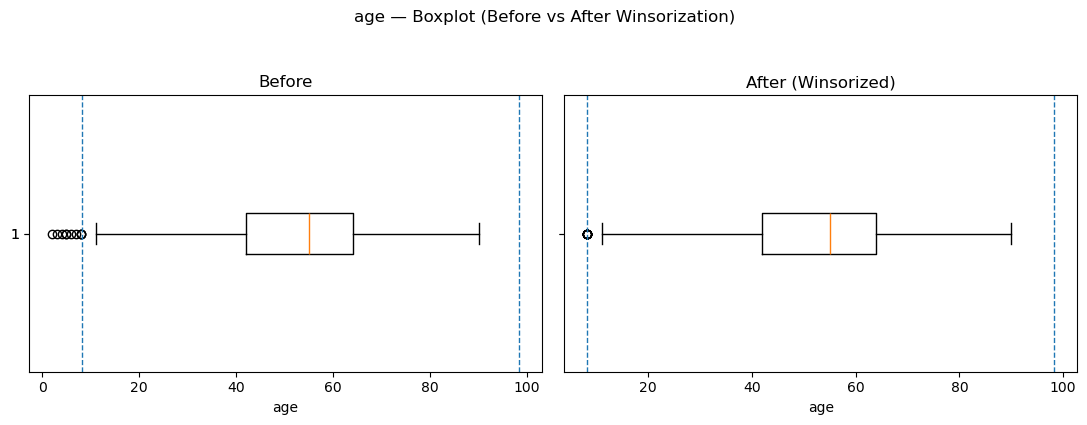

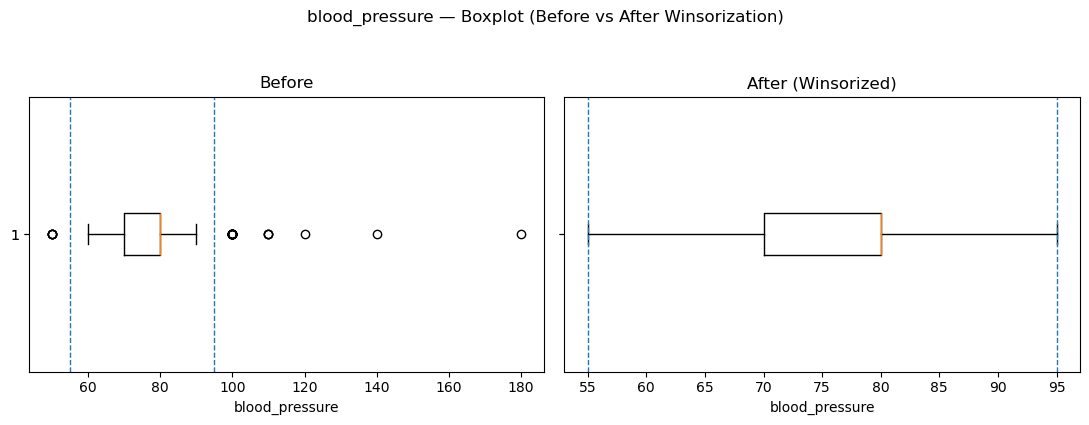

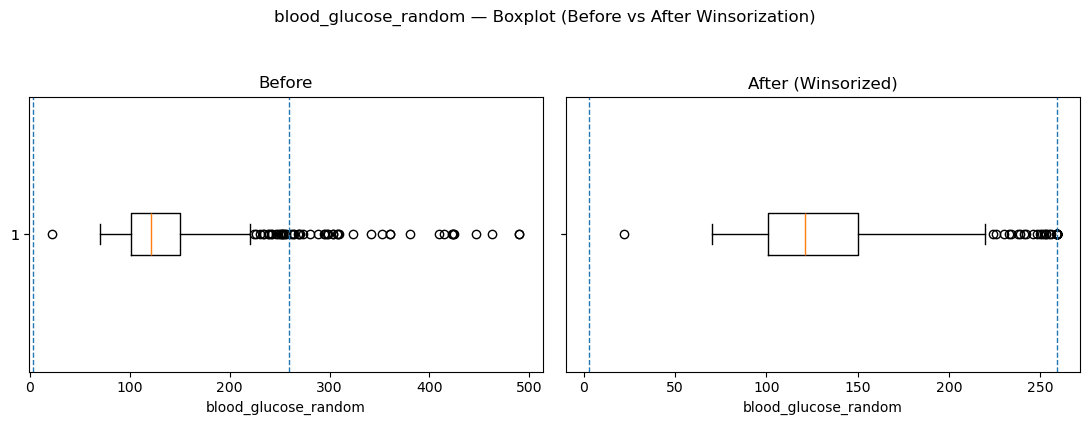

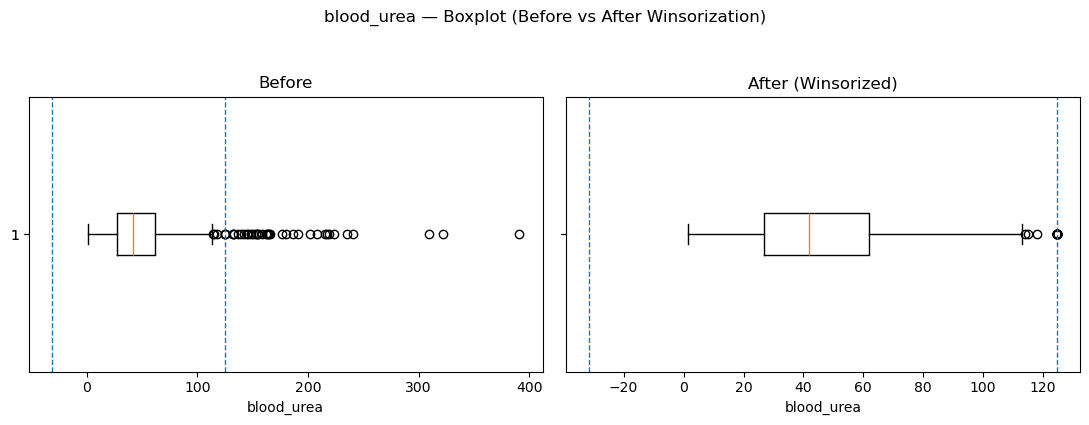

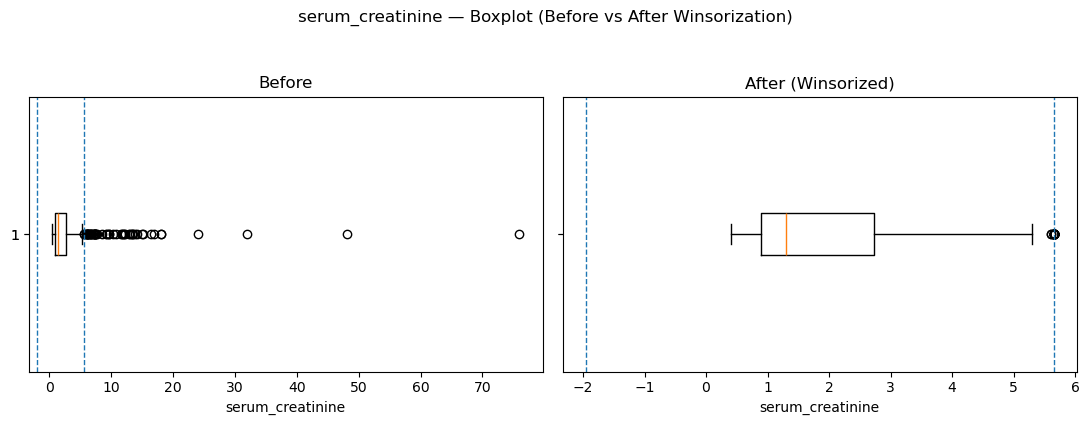

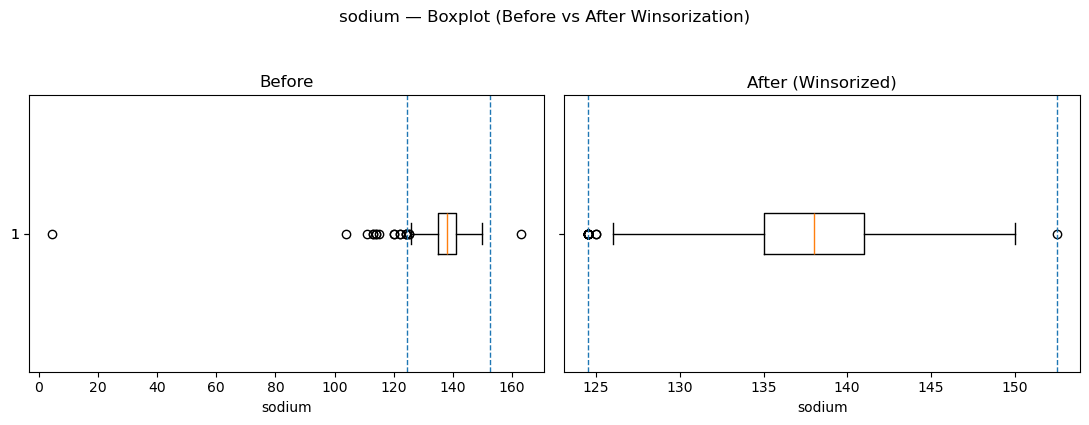

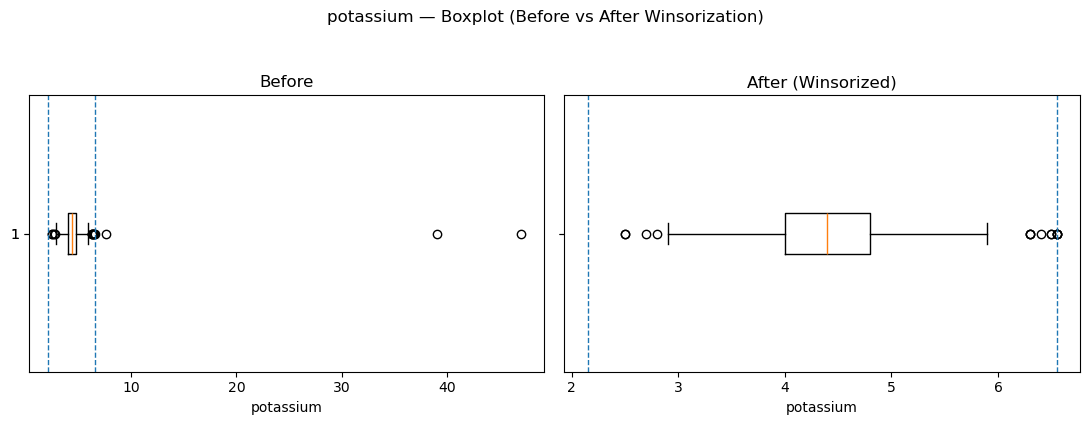

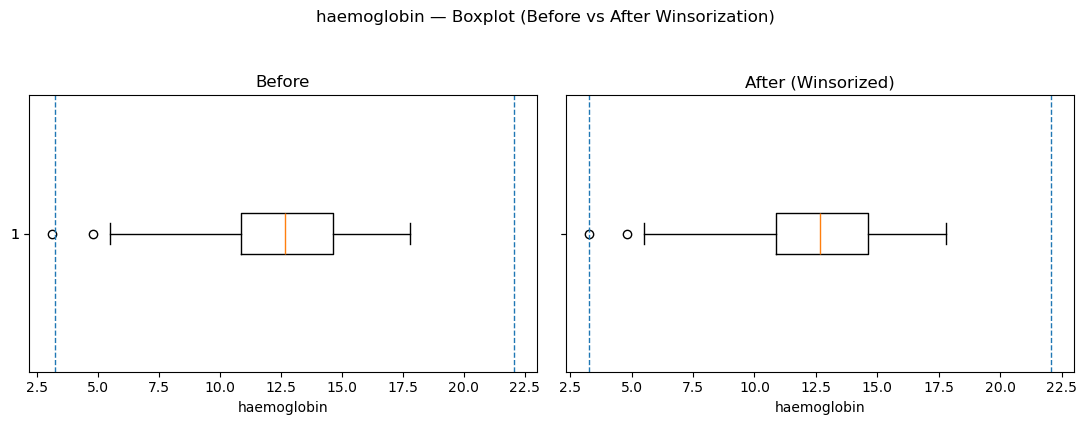

In [25]:
boxplots_before_after(df_imputed, df_winsorized, univariate_df)

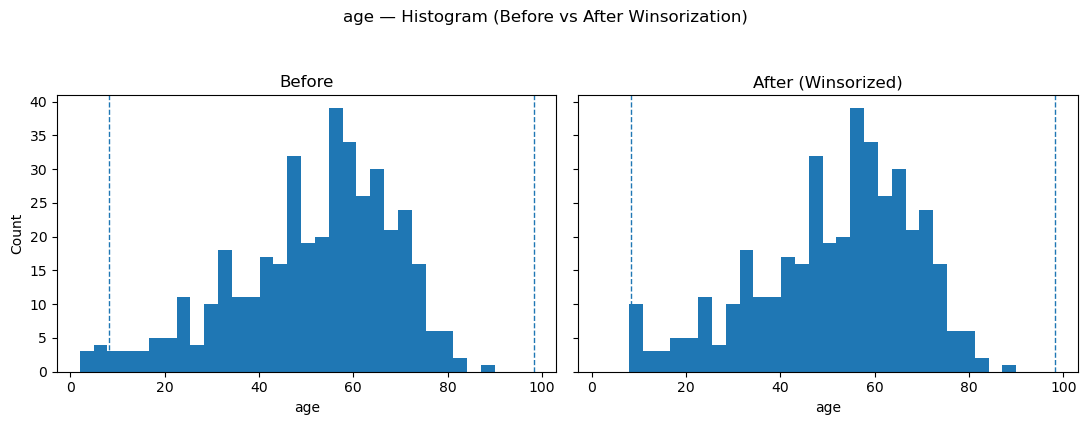

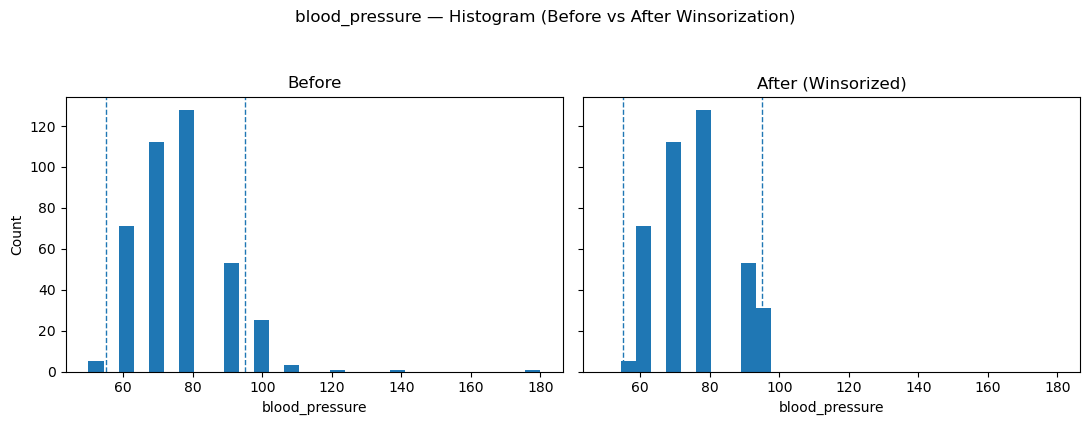

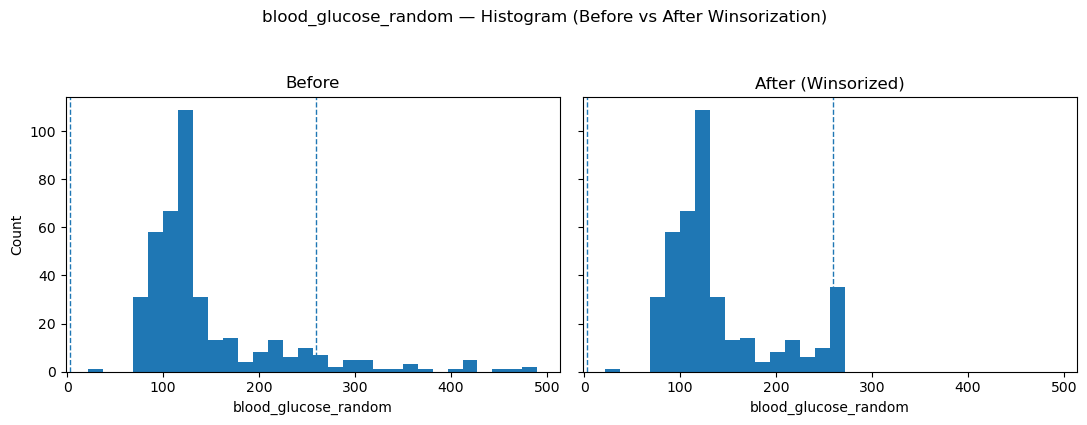

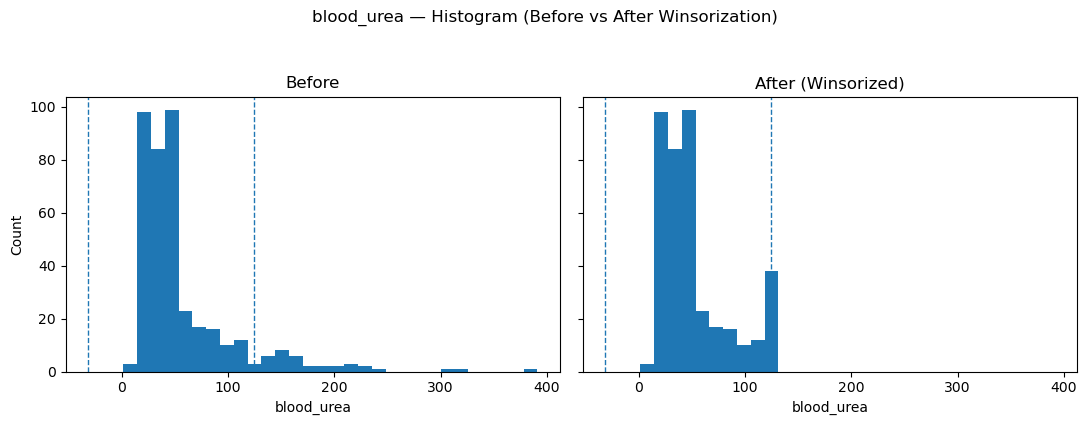

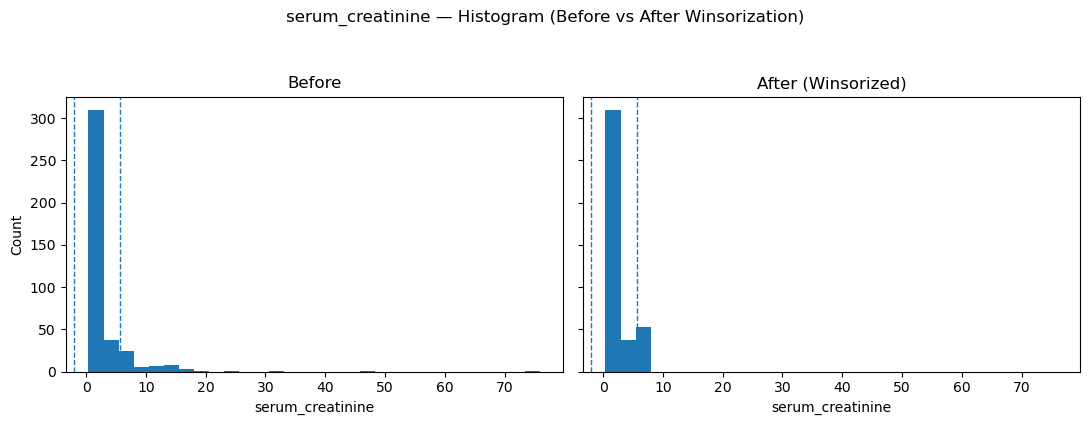

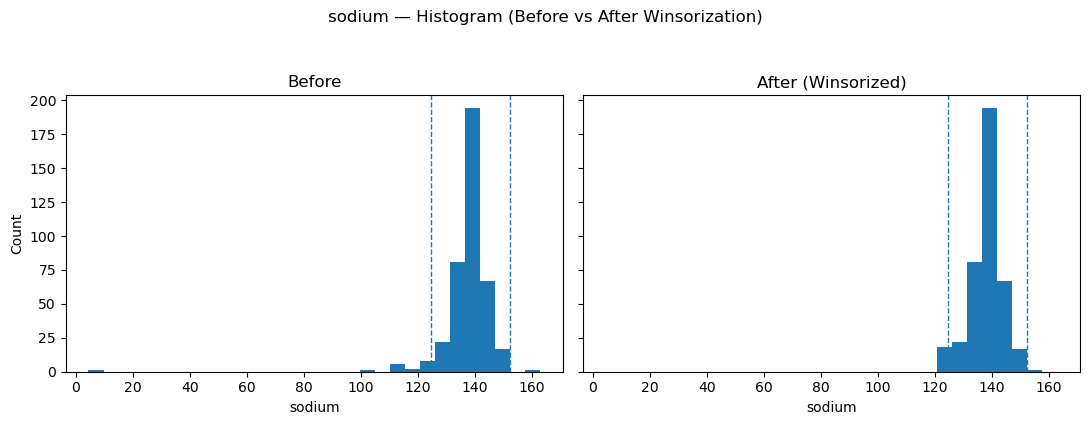

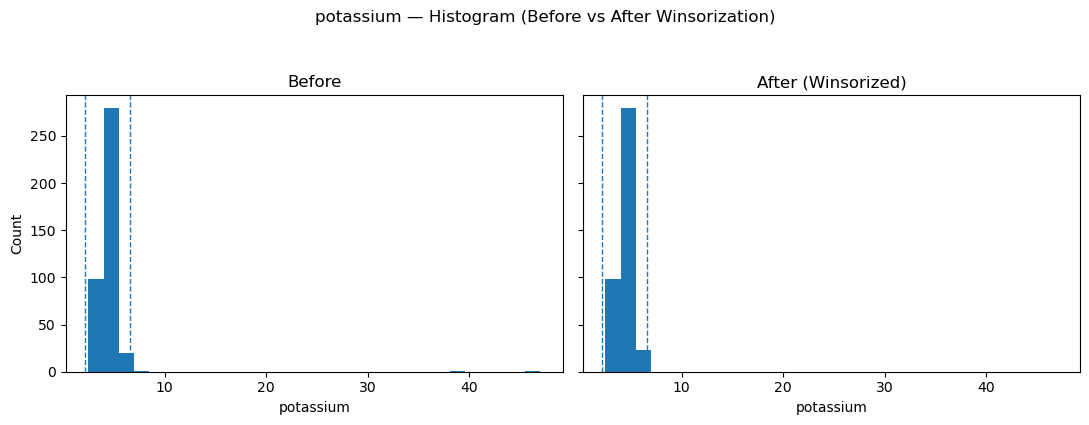

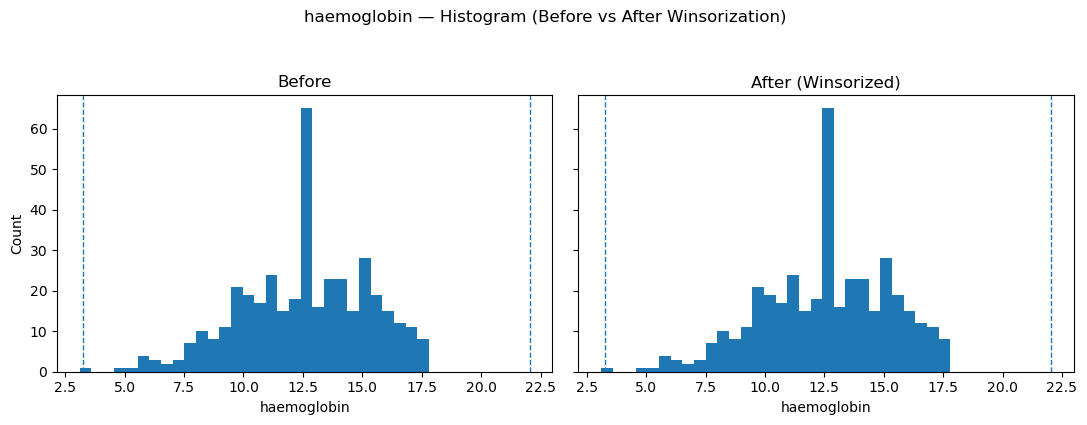

In [26]:
hist_before_after(df_imputed, df_winsorized, univariate_df, bins=30)

In [20]:
# Skewness & Kurtosis summary for numerical columns
sk_kurt_summary = []
for col in df_imputed.columns:
    skew = df_imputed[col].skew()
    kurt = df_imputed[col].kurtosis()
    sk_kurt_summary.append({
        "Column": col,
        "Skewness": round(skew, 2),
        "Kurtosis": round(kurt, 2),
        "Interpretation": (
            "Symmetric" if abs(skew) < 0.5 else
            "Right-Skewed" if skew > 0 else
            "Left-Skewed"
        )
    })

sk_kurt_df = pd.DataFrame(sk_kurt_summary).set_index("Column")
print(sk_kurt_df)


                      Skewness  Kurtosis Interpretation
Column                                                 
age                      -0.69      0.14    Left-Skewed
blood_pressure            1.60      8.90   Right-Skewed
blood_glucose_random      2.20      5.25   Right-Skewed
blood_urea                2.72     10.00   Right-Skewed
serum_creatinine          7.67     82.63   Right-Skewed
sodium                   -7.93    110.02    Left-Skewed
potassium                13.13    183.42   Right-Skewed
haemoglobin              -0.38     -0.08      Symmetric


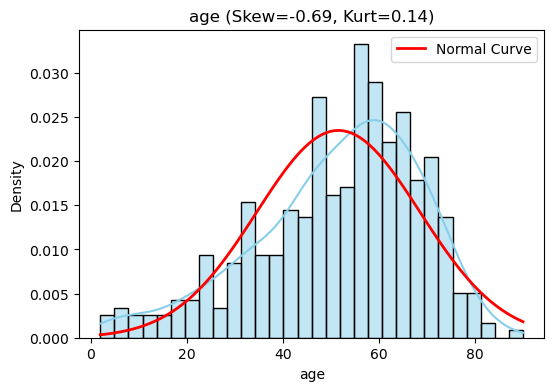

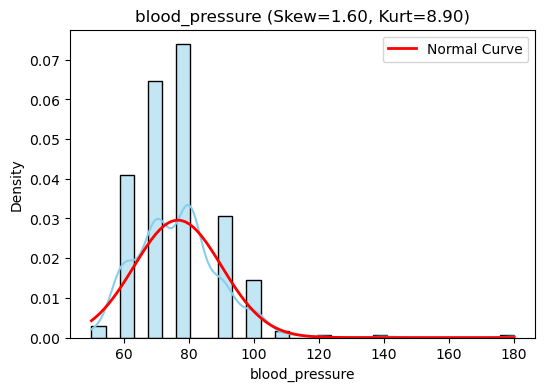

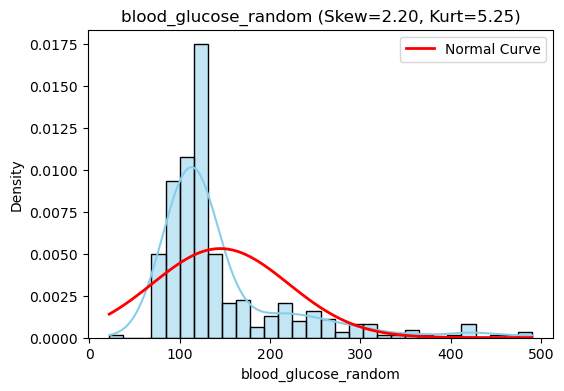

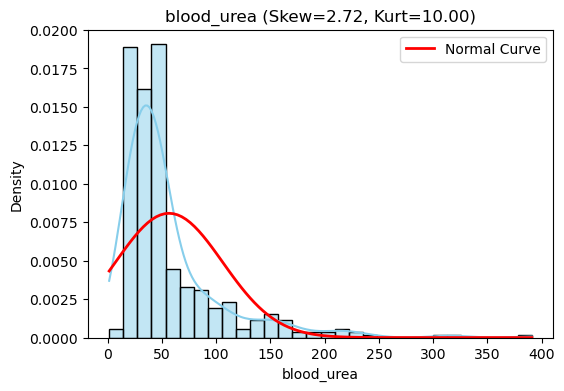

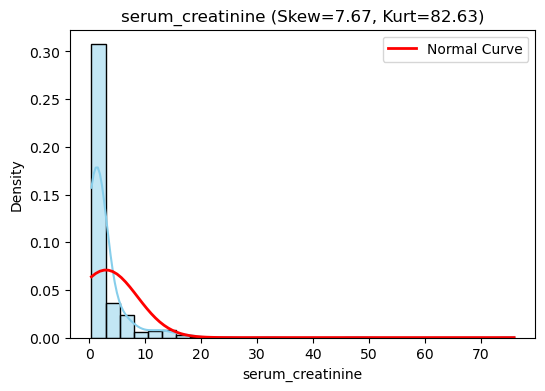

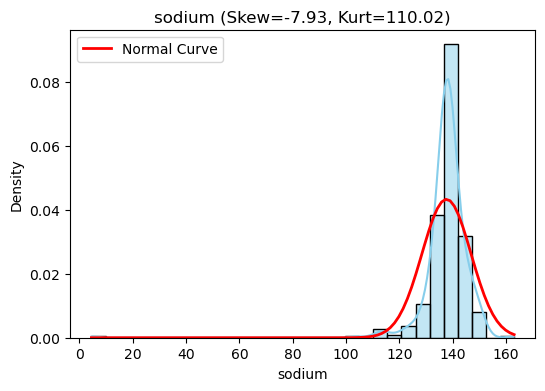

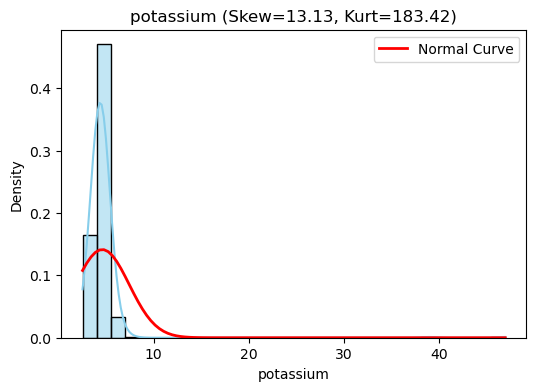

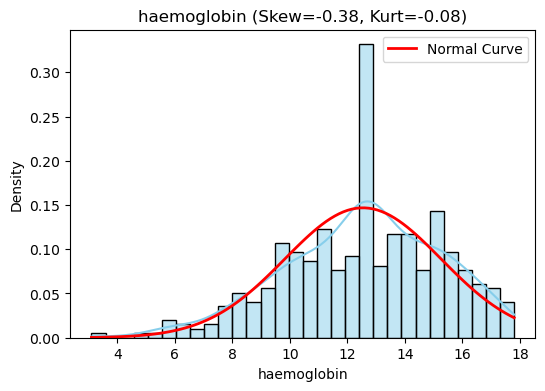

In [21]:
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

for col in df_imputed.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df_imputed[col], kde=True, stat="density", bins=30, color="skyblue")

    # Overlay normal distribution curve
    mu, sigma = df_imputed[col].mean(), df_imputed[col].std()
    x = np.linspace(df_imputed[col].min(), df_imputed[col].max(), 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r', linewidth=2, label="Normal Curve")

    plt.title(f"{col} (Skew={df_imputed[col].skew():.2f}, Kurt={df_imputed[col].kurtosis():.2f})")
    plt.legend()
    plt.show()


In [22]:
# Master Summary Table for Numerical UVA
master_summary = []

for col in df_imputed.columns:
    s = df_imputed[col]
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    
    skew = s.skew()
    kurt = s.kurtosis()
    
    lower_outliers = (s < lower).sum()
    upper_outliers = (s > upper).sum()
    
    master_summary.append({
        "Column": col,
        "Mean": round(s.mean(),2),
        "Median": round(s.median(),2),
        "Min": round(s.min(),2),
        "Max": round(s.max(),2),
        "IQR": round(iqr,2),
        "Skewness": round(skew,2),
        "Kurtosis": round(kurt,2),
        "Lower Outliers": lower_outliers,
        "Upper Outliers": upper_outliers,
        "Total Outliers": lower_outliers + upper_outliers
    })

master_df = pd.DataFrame(master_summary).set_index("Column")
print(master_df)


                        Mean  Median   Min    Max    IQR  Skewness  Kurtosis  \
Column                                                                         
age                    51.56   55.00   2.0   90.0  22.00     -0.69      0.14   
blood_pressure         76.58   80.00  50.0  180.0  10.00      1.60      8.90   
blood_glucose_random  145.06  121.00  22.0  490.0  49.00      2.20      5.25   
blood_urea             56.69   42.00   1.5  391.0  34.75      2.72     10.00   
serum_creatinine        3.00    1.30   0.4   76.0   1.83      7.67     82.63   
sodium                137.63  138.00   4.5  163.0   6.00     -7.93    110.02   
potassium               4.58    4.40   2.5   47.0   0.80     13.13    183.42   
haemoglobin            12.54   12.65   3.1   17.8   3.75     -0.38     -0.08   

                      Lower Outliers  Upper Outliers  Total Outliers  
Column                                                                
age                               10               0     